<a href="https://colab.research.google.com/github/AlexisSamboy/alexissamboy-data-portafolio/blob/main/proyectos/python_projects/04_parque-vehicular-dgii/notebooks/01_exploracion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📊Parque Vehicular de la Dirección General de Impuestos Internos (DGII)🚗**

🧭 **Introducción**

El parque vehicular es uno de los indicadores clave para comprender la dinámica económica, urbana y ambiental de la República Dominicana. A través de los datos publicados por la Dirección General de Impuestos Internos (DGII), es posible analizar cómo ha evolucionado la cantidad de vehículos, su tipología, distribución y crecimiento a lo largo del tiempo.

Este proyecto tiene como objetivo realizar un análisis exploratorio y descriptivo del parque vehicular dominicano, utilizando Python para la limpieza, transformación y análisis de los datos, y Tableau para la visualización interactiva de los principales hallazgos.

El desarrollo del proyecto se documenta completamente en Google Colab, permitiendo mostrar de forma transparente todo el proceso analítico: desde la carga y preparación de los datos hasta la generación de insights que aporten valor a la comprensión del comportamiento del parque vehicular en el país.

🎯 Objetivos del proyecto

* Analizar la evolución del parque vehicular en la República Dominicana.

* Identificar tendencias de crecimiento por tipo de vehículo.

* Evaluar la distribución del parque vehicular según variables relevantes (año, categoría, etc.).

* Generar visualizaciones claras y comprensibles que faciliten la interpretación de los datos.

* Construir una base de datos limpia y estructurada para su posterior modelado en Tableau.

### **✍️ Autor**

Soy **Alexis V. Samboy Herrera**, profesional y aficionado al **análisis de datos**. En este proyecto practico y desarrollo mis habilidades utilizando datos de la DGII para explorar el comportamiento del parque vehicular de la República Dominicana mediante Python

**Entrando en materia este proyecto sera realizado en dos etapas:**

***Etapa 1:***
* Carga de los datos mediante un archivo CSV (Archivo separado por comas)
* Limpieza de Datos
* Transformacion de esos datos
* Exportación de esos Datos en un archivo CSV

***Etapa 2:***
* Cargar datos a Tableau
* Crear visuales en tableau
* Crear Dashboard en Tableau
* Conclusión del analisis y hallazgos.

# **Etapa 1🧩**

##**Cargas de los datos📈**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Cargar el primer Archivo CSV
df_csv1=pd.read_csv('data1.csv', encoding='latin1')
display(df_csv1.head())

#Cargar el segundo Archivo CSV
df_csv2=pd.read_csv('data2.csv', encoding='latin1')
display(df_csv2.head())

,Año Inscripción,Mes Inscripción,Año Entrada,Descripción Clase,Tipo,Año Fabricación,Origen,Marca,Cantidad,Unnamed: 9
0,2007,1,2005,CARGA,4-Carga,2007,JAPONESES,TOYOTA,2,NaN
1,2007,1,2007,AMBULANCIA,8-Otros,2000,AMERICANO,CHEVROLET,1,NaN
2,2007,1,2007,AMBULANCIA,8-Otros,2006,EUROPEOS,MERCEDES BENZ,1,NaN
3,2007,1,2007,AMBULANCIA,8-Otros,2007,EUROPEOS,MERCEDES BENZ,8,NaN
4,2007,1,2007,AUTOBUS PRIVADO,2-Autobuses,2000,AMERICANO,CHEVROLET,2,NaN


,Año Inscripción,Mes Inscripción,Año Entrada,Descripción Clase,Tipo,Año Fabricación,Origen,Marca,Cantidad
0,2007.0,1.0,2005.0,CARGA,4-Carga,2007.0,JAPONESES,TOYOTA,2
1,2007.0,1.0,2007.0,AMBULANCIA,8-Otros,2000.0,AMERICANO,CHEVROLET,1
2,2007.0,1.0,2007.0,AMBULANCIA,8-Otros,2006.0,EUROPEOS,MERCEDES BENZ,1
3,2007.0,1.0,2007.0,AMBULANCIA,8-Otros,2007.0,EUROPEOS,MERCEDES BENZ,8
4,2007.0,1.0,2007.0,AUTOBUS PRIVADO,2-Autobuses,2000.0,AMERICANO,CHEVROLET,2


In [5]:
# Crear un lista temporal para concatenar en un solo DataFrame
datos_temporales=['df_csv1', 'df_csv2']

# Concatenar los archivos
# Aqui utilizamos un ciclo FOR para iterar dato por dato y agregarlo al nuevo dataframe

df=pd.concat([eval(dato) for dato in datos_temporales], axis=0, ignore_index=True) #El ignore_index es para olvidar los demas index e iniciar con nuevos index

display(df.head())


,Año Inscripción,Mes Inscripción,Año Entrada,Descripción Clase,Tipo,Año Fabricación,Origen,Marca,Cantidad,Unnamed: 9
0,2007.0,1.0,2005.0,CARGA,4-Carga,2007.0,JAPONESES,TOYOTA,2,NaN
1,2007.0,1.0,2007.0,AMBULANCIA,8-Otros,2000.0,AMERICANO,CHEVROLET,1,NaN
2,2007.0,1.0,2007.0,AMBULANCIA,8-Otros,2006.0,EUROPEOS,MERCEDES BENZ,1,NaN
3,2007.0,1.0,2007.0,AMBULANCIA,8-Otros,2007.0,EUROPEOS,MERCEDES BENZ,8,NaN
4,2007.0,1.0,2007.0,AUTOBUS PRIVADO,2-Autobuses,2000.0,AMERICANO,CHEVROLET,2,NaN


###**Vamos a inspeccionar los datos🔍**



In [6]:
df.shape # Vemos la dimension de nuestro dataframe

(326932, 10)

In [7]:
df.info() # Nos permite visualizar de manera rapida (Cantidad de datos nulos, tipo de datos, columnas totales)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326932 entries, 0 to 326931
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Año Inscripción    326931 non-null  float64
 1   Mes Inscripción    326931 non-null  float64
 2   Año Entrada        326931 non-null  float64
 3   Descripción Clase  326931 non-null  object 
 4   Tipo               326931 non-null  object 
 5   Año Fabricación    326931 non-null  float64
 6   Origen             321099 non-null  object 
 7   Marca              321099 non-null  object 
 8   Cantidad           326932 non-null  int64  
 9   Unnamed: 9         0 non-null       float64
dtypes: float64(5), int64(1), object(4)
memory usage: 24.9+ MB


### **Limpieza de datos🧹**

Hay datos los cuales no agregan nada importante a nuestro analisis, columnas como "Unnamed" no aporta nada porque no describe que significan eso datos, por lo tanto podemos eliminarla. De igual manera datos duplicados, datos nulos, todos esos datos podemos eliminarlos.

**Eliminamos Columna "Unnamed"**

In [8]:
df=df.drop(columns=["Unnamed: 9"])

Una observacion que tuve mas adelante y vine a corregir fue que la columna "Marca" tiene un espacio al final y eso provocaba que al graficar la grafica no se realizaba. Procedere a resolver ese problema antes de iniciar con lo demas.

In [9]:
df = df.rename(columns={'Marca ': 'Marca'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326932 entries, 0 to 326931
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Año Inscripción    326931 non-null  float64
 1   Mes Inscripción    326931 non-null  float64
 2   Año Entrada        326931 non-null  float64
 3   Descripción Clase  326931 non-null  object 
 4   Tipo               326931 non-null  object 
 5   Año Fabricación    326931 non-null  float64
 6   Origen             321099 non-null  object 
 7   Marca              321099 non-null  object 
 8   Cantidad           326932 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 22.4+ MB


**Eliminamos datos faltantes**

In [11]:
#Con esta funcion eliminamos los datos faltantes
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321099 entries, 0 to 326930
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Año Inscripción    321099 non-null  float64
 1   Mes Inscripción    321099 non-null  float64
 2   Año Entrada        321099 non-null  float64
 3   Descripción Clase  321099 non-null  object 
 4   Tipo               321099 non-null  object 
 5   Año Fabricación    321099 non-null  float64
 6   Origen             321099 non-null  object 
 7   Marca              321099 non-null  object 
 8   Cantidad           321099 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 24.5+ MB


**Eliminamos datos duplicados si existen**

In [12]:
print(f"Cantidad de registro antes del filtro: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Cantidad de registro despues del filtro: {df.shape}")

Cantidad de registro antes del filtro: (321099, 9)
Cantidad de registro despues del filtro: (176863, 9)


**OJO: Luego de aplicar un pequeño filtro para eliminar los datos duplicados observamos una gran redución de los datos y esto es debido que los datos iniciales o mejor explicado los archivos CSV iniciales tenian datos relacionados ya que el primer archivo era "Parque vehicular del 2007 - 2022" y el otro "Parque vehicular de 2007 - 2025" al tener tanto datos iguales al aplicar el filtro tuvo esa reducción de 144,236 registros.**

###**Vamos ahora a estandarizar los datos**

Revisar esas variables categoricas que podria existir algun error tipografico o alguna nomenclatura irrelevante o duplicada.

Realizaremos algunas graficas tipo barra que son excelentes para ver categorias y asi explorar mejor nuestros datos.

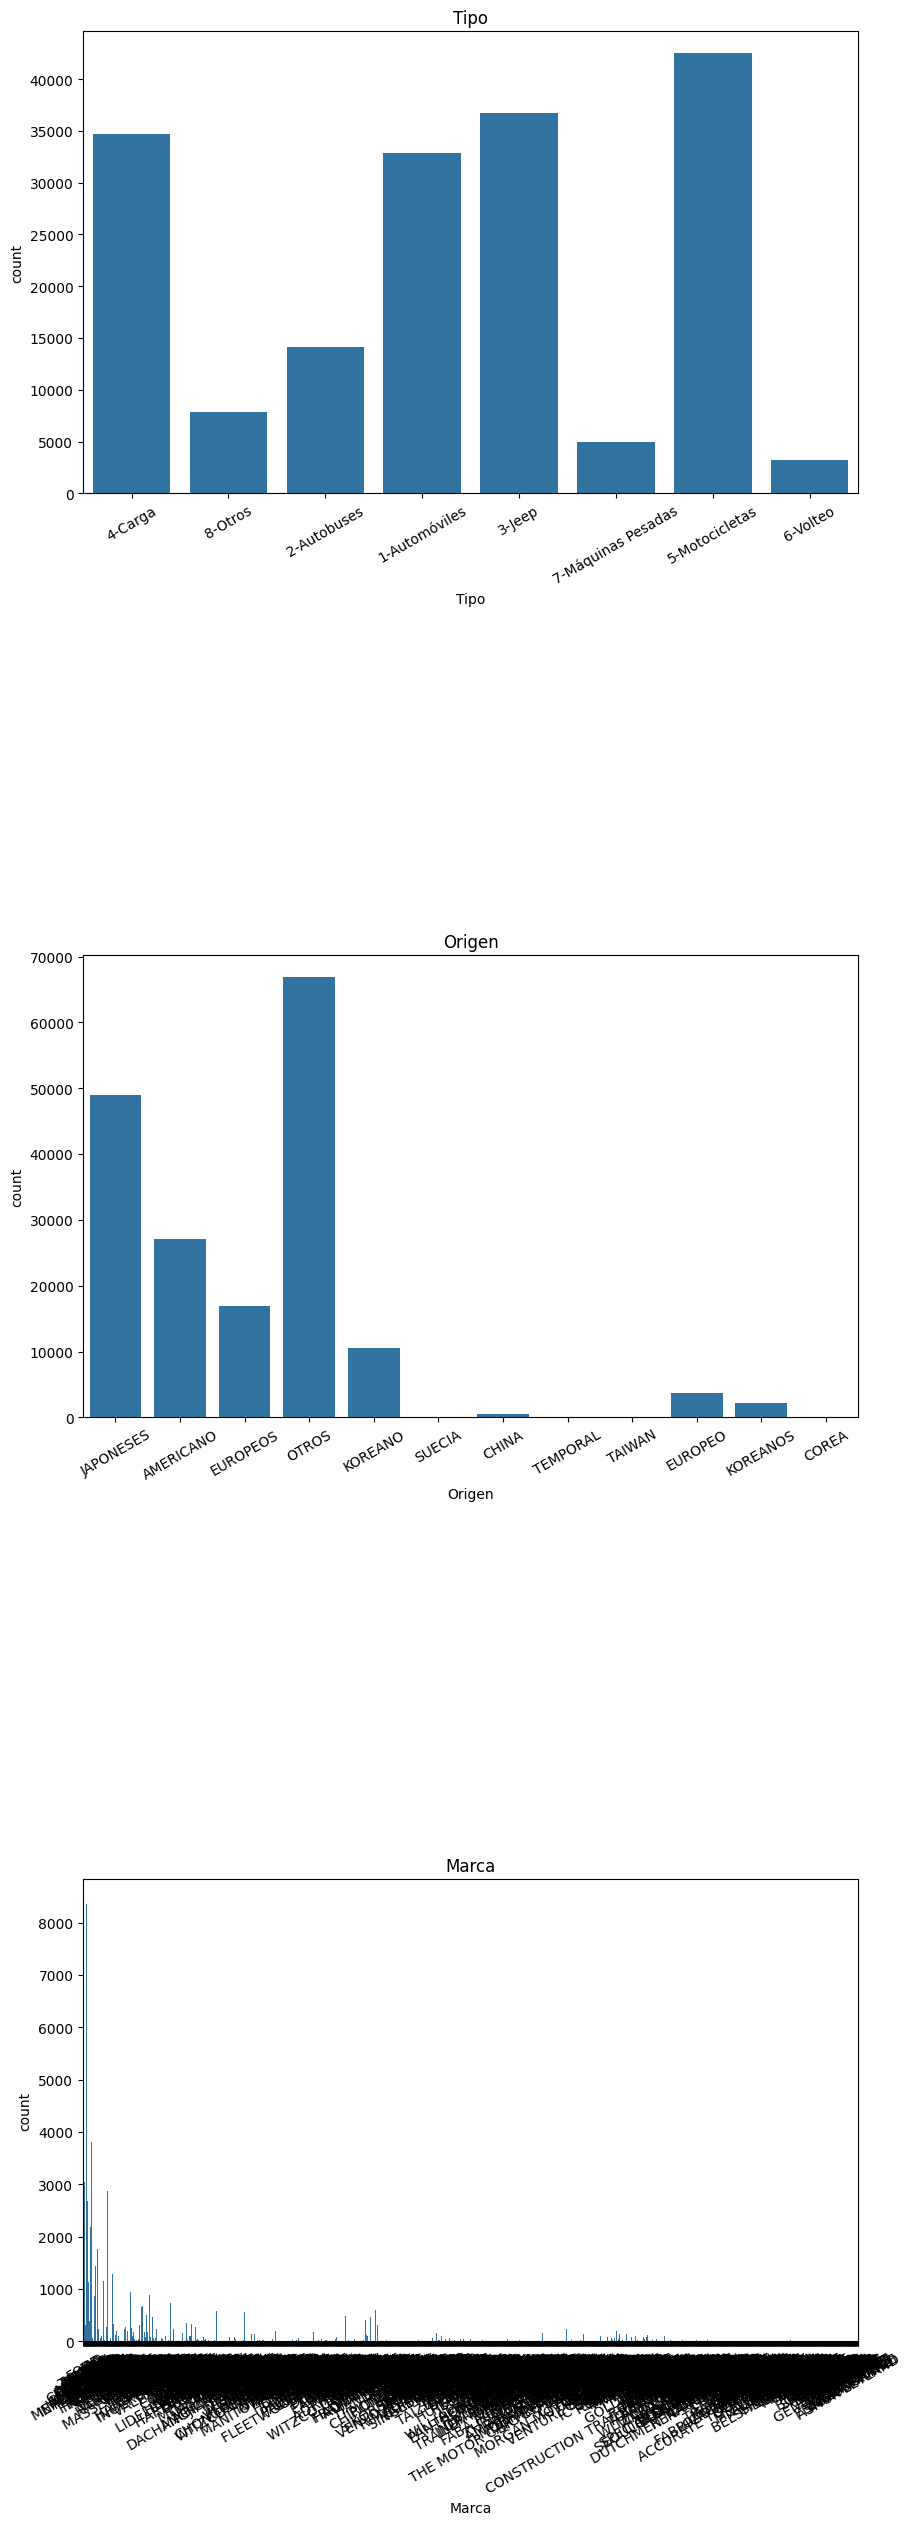

In [13]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['Tipo','Origen','Marca']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30)) # Aqui creamos la grafica tipo barra con algunos parametros
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):   # Aplicamos un ciclo para iterar variable por variable y realizar la grafica correspondiente
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', rotation=30);

A primera vista los datos no estan tan mal, pero se pueden mejorar.

Primero vamos a llevar todas las categorias en minusculas, luego vamos a empezar a unificar esas categorias relacionadas o iguales.

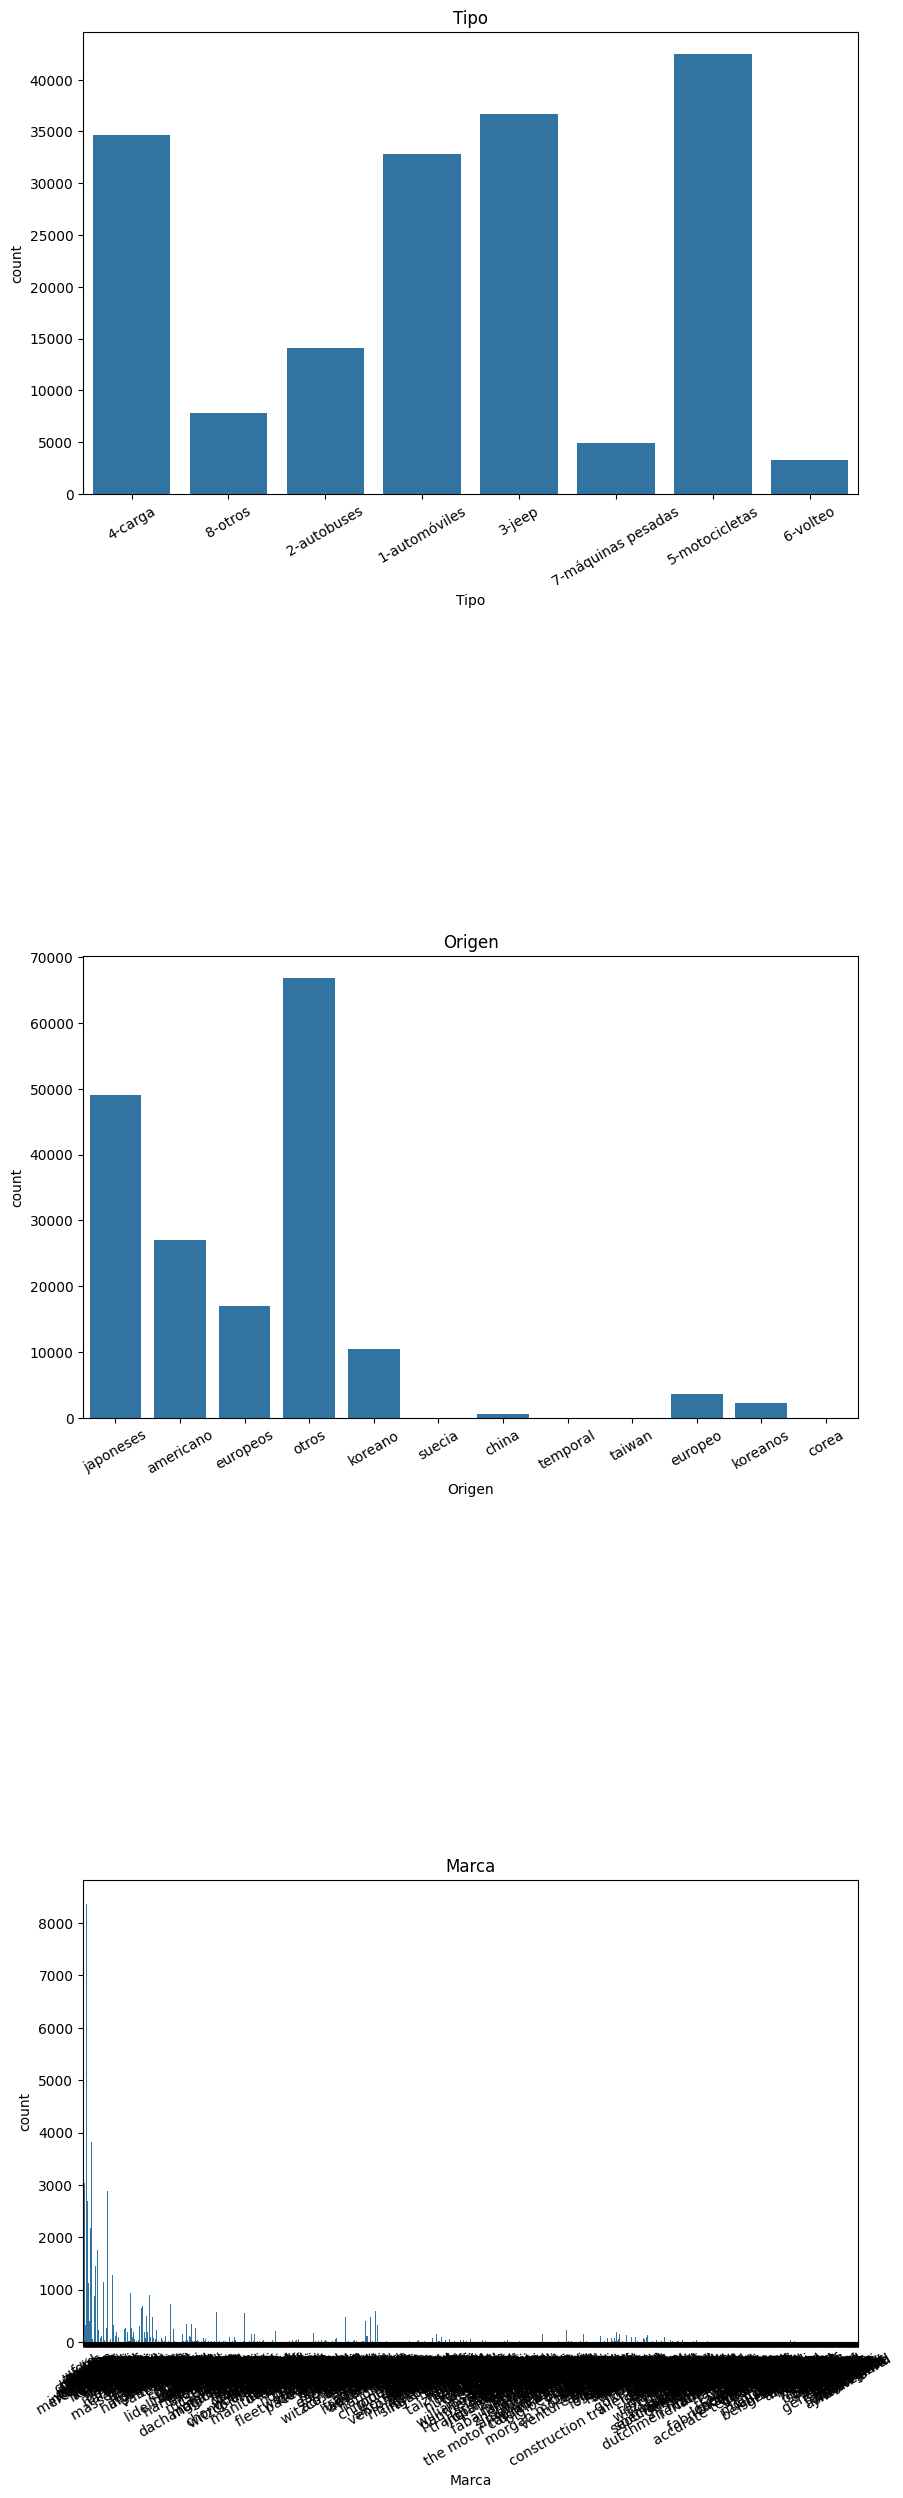

In [14]:
for column in df.columns:
    # Transformara en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        df[column] = df[column].str.lower()

# Ahora vamos a volver a graficar y ver como se ven los datos

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', rotation=30);


### **Vamos a estandarizar los datos**

In [15]:
print(df['Tipo'].unique())

['4-carga' '8-otros' '2-autobuses' '1-automóviles' '3-jeep'
 '7-máquinas pesadas' '5-motocicletas' '6-volteo']


In [16]:
#vamos a reemplazar todos los nombres de manera correcta
df['Tipo'] = df['Tipo'].replace({
    '4-carga': 'carga',
    '8-otros': 'otros',
    '2-autobuses': 'autobuses',
    '1-automóviles': 'automovil',
    '5-motocicletas': 'motocicletas',
    '3-jeep': 'jeep',
    '7-máquinas pesadas': 'maquinaria pesada',
    '6-volteo': 'volteo'
})
print(df['Tipo'].unique())

['carga' 'otros' 'autobuses' 'automovil' 'jeep' 'maquinaria pesada'
 'motocicletas' 'volteo']


In [17]:
print(df['Origen'].unique())

['japoneses' 'americano' 'europeos' 'otros' 'koreano' 'suecia' 'china'
 'temporal' 'taiwan' 'europeo' 'koreanos' 'corea']


In [18]:
print(df['Marca'].unique())

['toyota' 'chevrolet' 'mercedes benz' ... 'shanqi' 'tusa' 'wade']


In [19]:
df['Marca'].value_counts()

,count
Marca,
toyota,8404
honda,8358
ford,7835
nissan,7255
hyundai,7060
...,...
foday,1
dalton,1
shansu,1


**Observación:** Cuando aplicamos un conteo de las diferentes marcas existente en esa variable observamos que existen mas de 1800 marcas, realmente es un dato excesivo, debemos de filtrar un poco mas. La idea que me surge es aplicar un filtro para solo extraer las marcas que superen los 500 registros y las que tengan menos de 500 clasificarla como otras marcas.

In [20]:
# crear nueva variable donde almacenamos cantidad de registros unicos

conteo_marca = df['Marca'].value_counts()

#crear filtro para extraer las marcas con mas de 500 registros

marcas_filtradas = conteo_marca[conteo_marca >= 500].index

#clasificar marcas que no cumplan el requisito como otras

df['Marca'] = df['Marca'].where(df['Marca'].isin(marcas_filtradas), 'otras')

Vamos a visualizar si funciono nuestro filtro

In [21]:
df['Marca'].value_counts()

,count
Marca,
otras,41147
toyota,8404
honda,8358
ford,7835
nissan,7255
...,...
shineray,556
p g o,536
john deere,534


**¡Ahora si!** Luego de aplicar esa pequeña técnica todo tomo forma y es mas facil manejar esos registros.

### **Continuaremos estandarizando los datos, unificando variables duplicadas**

In [22]:
print(df['Origen'].unique())

['japoneses' 'americano' 'europeos' 'otros' 'koreano' 'suecia' 'china'
 'temporal' 'taiwan' 'europeo' 'koreanos' 'corea']


In [24]:
# Unificaremos "koreano" y "koreanos"
df['Origen'] = df['Origen'].replace('koreano', 'koreanos')
print(df['Origen'].unique())

['japoneses' 'americano' 'europeos' 'otros' 'koreanos' 'suecia' 'china'
 'temporal' 'taiwan' 'europeo' 'corea']


In [25]:
# Unificaremos "corea." y "koreanos"
df['Origen'] = df['Origen'].replace('corea', 'koreanos')
print(df['Origen'].unique())

['japoneses' 'americano' 'europeos' 'otros' 'koreanos' 'suecia' 'china'
 'temporal' 'taiwan' 'europeo']


In [26]:
# Unificaremos "temporal" y "otros"
df['Origen'] = df['Origen'].replace('temporal', 'otros')
print(df['Origen'].unique())

['japoneses' 'americano' 'europeos' 'otros' 'koreanos' 'suecia' 'china'
 'taiwan' 'europeo']


In [27]:
# Unificaremos "europeo." y "europeos"
df['Origen'] = df['Origen'].replace('europeo', 'europeos')
print(df['Origen'].unique())

['japoneses' 'americano' 'europeos' 'otros' 'koreanos' 'suecia' 'china'
 'taiwan']


### **Con estos metodos utilizados podriamos decir que terminamos de limpiar la data de manera superficial**

Vamos a crear unas graficas nuevamente y visualizar manera general si todo esta correcto.

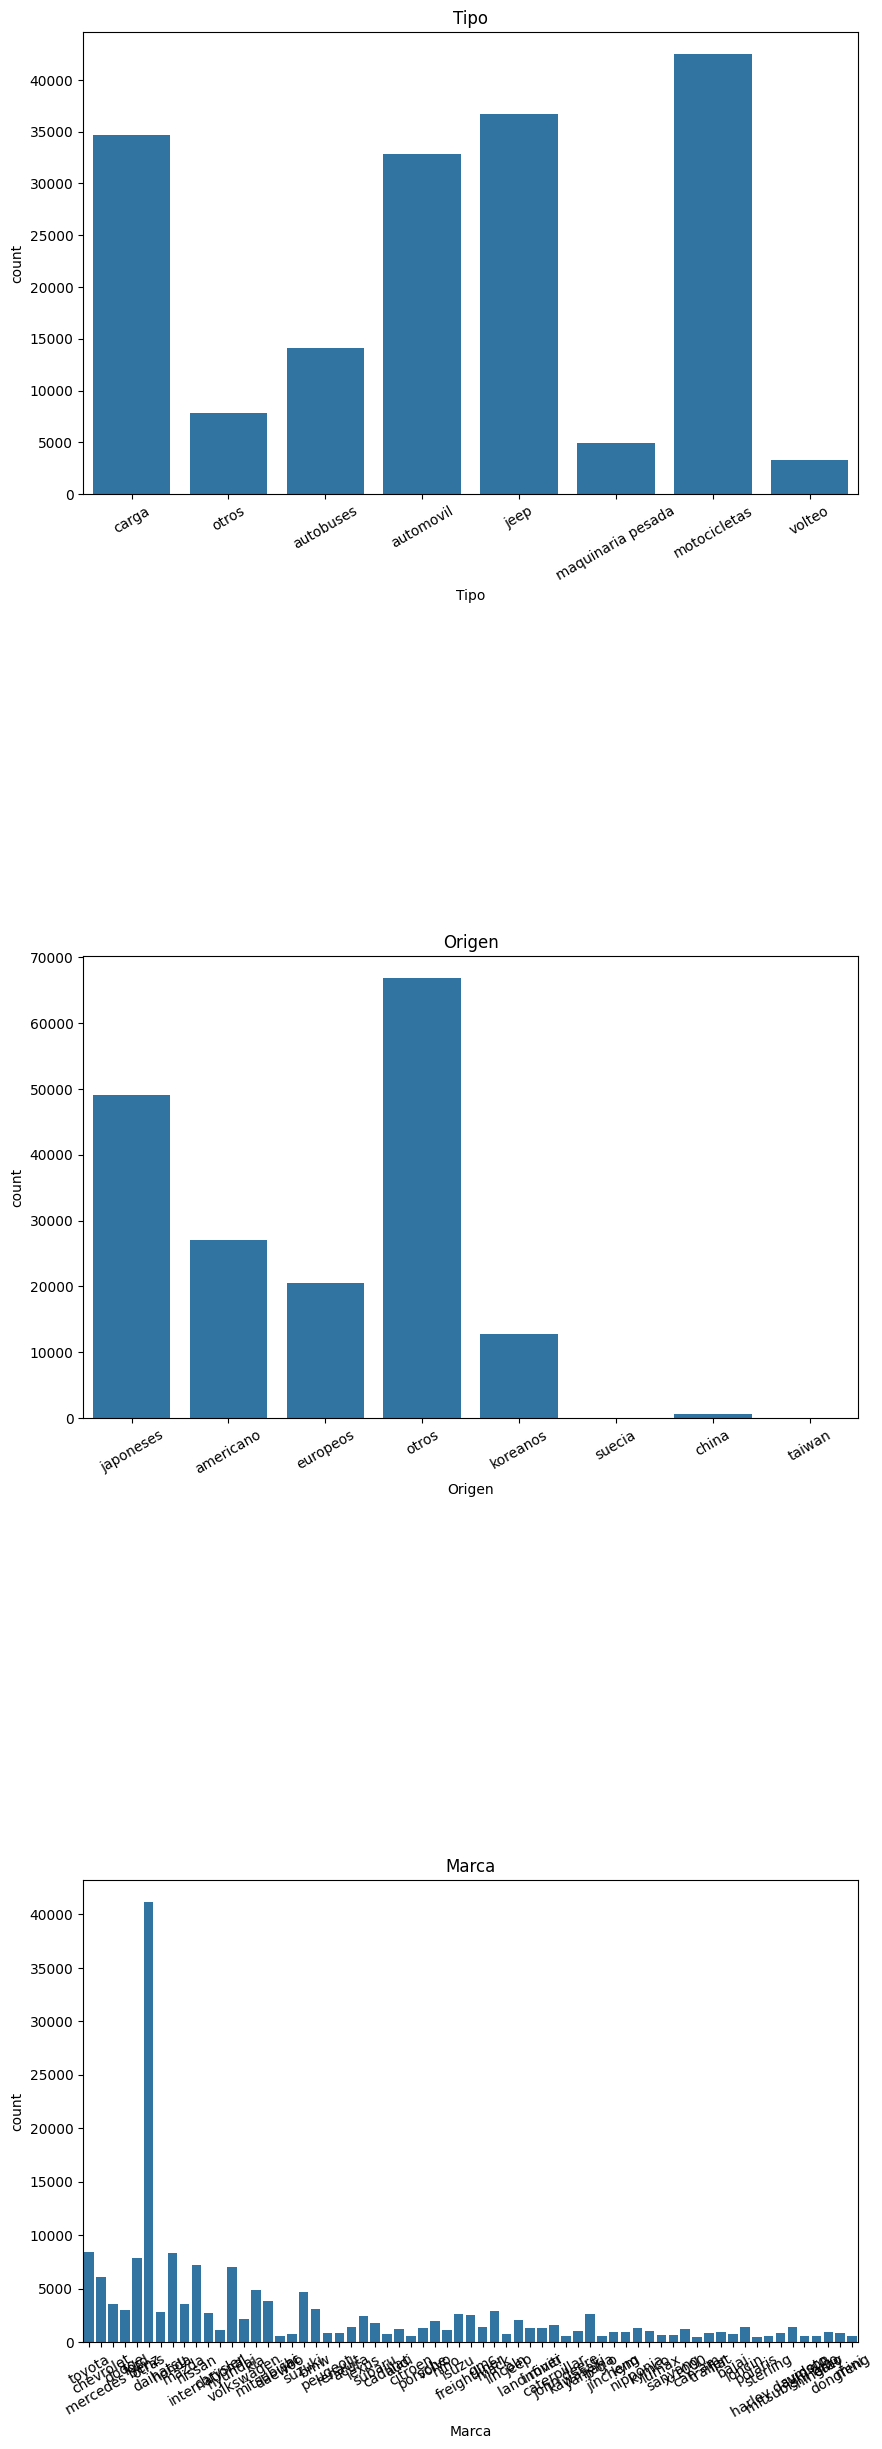

In [28]:
# Graficar variable categórica
cols_cat = ['Tipo','Origen','Marca']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30)) # Aqui creamos la grafica tipo barra con algunos parametros
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):   # Aplicamos un ciclo para iterar variable por variable y realizar la grafica correspondiente
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', rotation=30);

Definitivamente todo se ve correcto y en perfecto estado. Solo resta exportar la data ya limpia y continuar con las visualizaciones de los datos en Tableau.

# **Exportación de la data en archivo CSV**

In [29]:
ruta_exportacion= "/content/registro_vehicular_DGII.csv" # ruta a donde guardar el archivo y nombre como se guardara

df.to_csv(ruta_exportacion, index=False) #exportación del archivo CSV

# **Etapa 2📊**